In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
import logging
import sys

In [2]:
import os , sys
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from src import data_loader as dl
from scripts.Feature_Engineering import create_aggregate_features,extract_time_features,encode_categorical_variables,check_and_handle_missing_values,standardize_numerical_features,construct_rfms_scores,save_transformed_data


2025-03-06 18:47:18,052 - INFO - Directory already exists: c:\Users\HP\Documents\Dagii\Credit-scoring-model\data
2025-03-06 18:47:18,070 - INFO - Directory already exists: c:\Users\HP\Documents\Dagii\Credit-scoring-model\src\../logs


In [3]:
#import data
data = dl.load_data("data.csv")
data.head()

2025-03-06 18:47:18,103 - INFO - Attempting to load data from: c:\Users\HP\Documents\Dagii\Credit-scoring-model\data\data.csv
2025-03-06 18:47:18,487 - INFO - Successfully loaded data from: c:\Users\HP\Documents\Dagii\Credit-scoring-model\data\data.csv


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# Step 1: Create Aggregate Features
Create Aggregate Features
Aggregate transaction data by CustomerId to compute total, average, count, and standard deviation of amounts.

In [4]:
data = create_aggregate_features(data)
data.head()

2025-03-06 18:47:18,505 - INFO - Creating aggregate features for customers
2025-03-06 18:47:18,505 - INFO - Processing all transactions
2025-03-06 18:47:18,578 - INFO - Aggregate features created successfully


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


aggregates the transaction amounts for each customer. Specifically, it groups the data by CustomerId and calculates the sum of the Amount for each customer

# Step 2: Extract Time Features
 Extract Time Features
Extract hour, day, month, and year from TransactionStartTime.

In [5]:
data = extract_time_features(data)
data.head()

2025-03-06 18:47:18,610 - INFO - Extracting time-based features
2025-03-06 18:47:18,765 - INFO - Time features extracted successfully


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


## Extracted Transaction Features
The above new columns were added to the DataFrame based on the transaction timestamp (TransactionStartTime):

TransactionHour: The hour of the day when the transaction occurred.

TransactionDay: The day of the month when the transaction occurred.

TransactionMonth: The month when the transaction occurred.

TransactionYear: The year when the transaction occurred

Identify Categorical Columns for Encoding

# Step 3: Construct RFMS Scores to Generate Label

2025-03-06 18:47:18,797 - INFO - Constructing RFMS scores
2025-03-06 18:47:18,822 - INFO - RFMS score distribution:
Label
0    47835
1    47827
Name: count, dtype: int64
2025-03-06 18:47:18,823 - INFO - Visualizing RFMS space


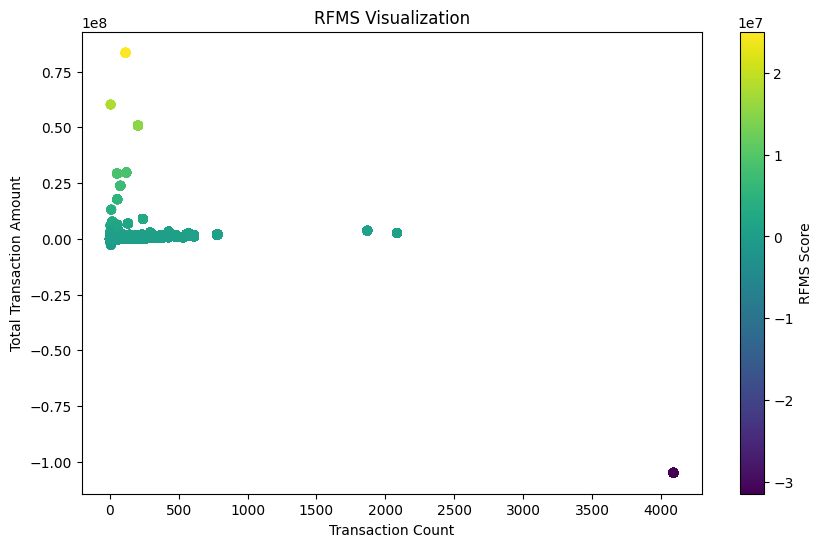

2025-03-06 18:47:20,887 - INFO - Binning RFMS_score for WOE calculation
2025-03-06 18:47:20,894 - INFO - Validating bin distribution
RFMS_score_binned distribution:
 RFMS_score_binned
11    90672
0      4091
12      252
16      205
14      175
13      132
19      115
10       13
17        7
Name: count, dtype: int64
Label distribution by RFMS_score_binned:
 RFMS_score_binned  Label
0                  0         4091
10                 0           13
11                 1        46941
                   0        43731
12                 1          252
13                 1          132
14                 1          175
16                 1          205
17                 1            7
19                 1          115
Name: count, dtype: int64
2025-03-06 18:47:20,904 - INFO - Calculating WOE for RFMS_score_binned
2025-03-06 18:47:20,904 - INFO - Calculating WOE for feature: RFMS_score_binned
2025-03-06 18:47:20,904 - INFO - WOE and IV calculated for RFMS_score_binned. IV: 0.00477625919298

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Recency,RFMS_score,Label,RFMS_score_binned,RFMS_score_binned_WOE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,3042.294251,2,15,11,2018,2303,33012.225174,0,11,-0.071002
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,3042.294251,2,15,11,2018,2303,33012.225174,0,11,-0.071002
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,0.000000,2,15,11,2018,2303,300.600174,0,11,-0.071002
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,17169.241610,3,15,11,2018,2303,68629.560174,1,11,-0.071002
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,17169.241610,3,15,11,2018,2303,68629.560174,1,11,-0.071002


In [6]:
data = construct_rfms_scores(data)
data.head()

# Step 4: Encode Categorical Variables using RFMS Label as Target

In [7]:
data = encode_categorical_variables(data, target_variable='Label')
data.head()

2025-03-06 18:47:20,953 - INFO - Encoding categorical variables
2025-03-06 18:47:20,958 - INFO - Converted ProviderId to category codes
2025-03-06 18:47:20,971 - INFO - Converted ProductId to category codes
2025-03-06 18:47:20,977 - INFO - Converted ProductCategory to category codes
2025-03-06 18:47:20,977 - INFO - Applying WOE encoding
2025-03-06 18:47:20,977 - INFO - Calculating WOE for feature: ProviderId
2025-03-06 18:47:20,992 - INFO - WOE and IV calculated for ProviderId. IV: 0.13202650052403148
2025-03-06 18:47:20,992 - INFO - WOE calculation completed for ProviderId
2025-03-06 18:47:21,051 - INFO - Calculating WOE for feature: ProductId
2025-03-06 18:47:21,073 - INFO - WOE and IV calculated for ProductId. IV: 0.052235071315386856
2025-03-06 18:47:21,094 - INFO - WOE calculation completed for ProductId
2025-03-06 18:47:21,144 - INFO - Calculating WOE for feature: ProductCategory
2025-03-06 18:47:21,160 - INFO - WOE and IV calculated for ProductCategory. IV: 0.027772767137246857


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,RFMS_score_binned_WOE,ProviderId_WOE,ProviderId_WOE,ProductId_WOE,ProductId_WOE,ProductCategory_WOE,ProductCategory_WOE,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,0,...,-0.071002,-0.413610,-0.413610,0.304295,0.304295,0.109343,0.109343,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,0,...,-0.071002,-0.413610,-0.413610,0.214869,0.214869,0.109343,0.109343,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,8,...,-0.071002,0.481371,0.481371,-0.361181,-0.361181,-0.427382,-0.427382,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False


# Step 6: Standardize Numerical Features

In [8]:
data = standardize_numerical_features(data)
data.head()

2025-03-06 18:47:21,326 - INFO - Standardizing numerical features
2025-03-06 18:47:21,374 - INFO - Standardized features sample:
     Amount     Value  Total_Transaction_Amount  Average_Transaction_Amount  \
0 -0.046371 -0.072291                  0.170118                   -0.067623   
1 -0.054643 -0.080251                  0.170118                   -0.067623   
2 -0.050426 -0.076352                  0.165122                   -0.072568   
3  0.107717  0.096648                  0.175567                   -0.008155   
4 -0.059704 -0.075183                  0.175567                   -0.008155   

   Transaction_Count  Std_Transaction_Amount  
0          -0.311831               -0.167016  
1          -0.311831               -0.167016  
2          -0.444993               -0.201209  
3          -0.404020               -0.008243  
4          -0.404020               -0.008243  


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,RFMS_score_binned_WOE,ProviderId_WOE,ProviderId_WOE,ProductId_WOE,ProductId_WOE,ProductCategory_WOE,ProductCategory_WOE,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,0,...,-0.071002,-0.413610,-0.413610,0.304295,0.304295,0.109343,0.109343,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,0,...,-0.071002,-0.413610,-0.413610,0.214869,0.214869,0.109343,0.109343,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,8,...,-0.071002,0.481371,0.481371,-0.361181,-0.361181,-0.427382,-0.427382,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False


In [9]:
data.columns.tolist()

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'Amount',
 'Value',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult',
 'Total_Transaction_Amount',
 'Average_Transaction_Amount',
 'Transaction_Count',
 'Std_Transaction_Amount',
 'Transaction_Hour',
 'Transaction_Day',
 'Transaction_Month',
 'Transaction_Year',
 'Recency',
 'RFMS_score',
 'Label',
 'RFMS_score_binned',
 'RFMS_score_binned_WOE',
 'ProviderId_WOE',
 'ProviderId_WOE',
 'ProductId_WOE',
 'ProductId_WOE',
 'ProductCategory_WOE',
 'ProductCategory_WOE',
 'ChannelId_ChannelId_2',
 'ChannelId_ChannelId_3',
 'ChannelId_ChannelId_5']

In [10]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,RFMS_score_binned_WOE,ProviderId_WOE,ProviderId_WOE,ProductId_WOE,ProductId_WOE,ProductCategory_WOE,ProductCategory_WOE,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,0,...,-0.071002,-0.413610,-0.413610,0.304295,0.304295,0.109343,0.109343,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,0,...,-0.071002,-0.413610,-0.413610,0.214869,0.214869,0.109343,0.109343,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,8,...,-0.071002,0.481371,0.481371,-0.361181,-0.361181,-0.427382,-0.427382,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False


In [11]:
print("Current working directory:", os.getcwd())
save_transformed_data(data, output_path="data/transformed_data_credit_scoring.csv")
print("Transformed data saved successfully as CSV")

Current working directory: c:\Users\HP\Documents\Dagii\Credit-scoring-model\notebooks
2025-03-06 18:47:21,459 - INFO - Saving transformed data to data/transformed_data_credit_scoring.csv
2025-03-06 18:47:21,460 - INFO - Created output directory: data
2025-03-06 18:47:24,755 - INFO - Successfully saved transformed data to data/transformed_data_credit_scoring.csv
2025-03-06 18:47:24,755 - INFO - Total columns saved: 37
2025-03-06 18:47:24,755 - INFO - Column names saved: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Std_Transaction_Amount', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year', 'Recency', 'RFMS_score', 'Label', 'RFMS_score_binned', 'RFMS_score_binned_WOE', 'ProviderId_WOE', 'ProviderId_WOE

In [ ]:
summary_statistics(data)

Summary statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


# RFMS Score and Label Assignment for Customer Segmentation

1. **Recency**: 
   - Measures the time since the last transaction.
   - Lower recency indicates more recent activity.

2. **Frequency (Transaction_Count)**:
   - Counts the number of transactions.
   - Higher frequency indicates more engaged customers.

3. **Monetary (Total_Transaction_Amount)**:
   - Sums the total amount spent by the customer.
   - Higher amounts indicate more valuable customers.

4. **Additional Score (Std_Transaction_Amount)**:
   - Measures the variability in spending behavior.

## Calculation
The RFMS score is calculated using the following formula:

Labels are assigned based on the median RFMS score:

Good: RFMS score above the median.

Bad: RFMS score below or equal to the median.
Assign Good (1) and Bad (0) labels based on the threshold

In [13]:
saved_data = pd.read_csv("data/transformed_data_credit_scoring.csv")
print(saved_data.columns.tolist())

['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Std_Transaction_Amount', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year', 'Recency', 'RFMS_score', 'Label', 'RFMS_score_binned', 'RFMS_score_binned_WOE', 'ProviderId_WOE', 'ProviderId_WOE.1', 'ProductId_WOE', 'ProductId_WOE.1', 'ProductCategory_WOE', 'ProductCategory_WOE.1', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5']
